# **DS331 Lab 6: CRISP-DM Phase4, Modeling (Classification)**


### 📥 Download AI in HealthCare Dataset  
[<button style="background-color:#008CBA; color:white; padding:10px 15px; border:none; border-radius:5px;">Click Here to Download</button>](https://drive.google.com/drive/folders/18UHGmcat5yFGkQPmzgwkntlCnMz89UCw?usp=drive_link)

In [2]:
# ----------------------------
# Import Libraries and Dataset
# ----------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from IPython.display import display

# Load dataset 
df = pd.read_csv("AI_dataset_cleaned.csv")

## **1. Preparing Data for Classification**


In [4]:
target_col = 'Diagnosis'
features = ['Age', 'Gender', 'Blood_Pressure', 'Heart_Rate', 'Temperature',
    'Medication', 'Insurance_Type', 'Lab_Test_Results', 'X-ray_Results',
    'Surgery_Type', 'Family_History', 'AI_Diagnosis_Confidence'
]

X = df[features].copy()
y = df[target_col]

# Handle missing values (drop rows with missing data in selected features)
data = pd.concat([X, y], axis=1)
data.dropna(inplace=True)

# Update X and y after dropping rows
X = data[features]
y = data[target_col]

# Encode categorical features
categorical_cols = ['Gender', 'Medication', 'Insurance_Type', 'X-ray_Results', 'Surgery_Type', 'Family_History']
X = pd.get_dummies(X, columns=categorical_cols)  # One-hot encoding for nominal data

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1,
    stratify=y
)

display(X_train.shape, X_test.shape, len(y_train), len(y_test), le.classes_)

(2915, 29)

(729, 29)

2915

729

array(['Cancer', 'Diabetes', 'Heart Disease', 'Hypertension', 'Influenza'],
      dtype=object)

In [5]:
# (2915, 29) (729, 29) 2915 729 ['Cancer' 'Diabetes' 'Heart Disease' 'Hypertension' 'Influenza']

## **2. Decision Tree Classifier**


- Decision Tree Accuracy: 19.89 %

- Classification Report:
                precision    recall  f1-score   support

       Cancer       0.20      0.05      0.08       148
     Diabetes       0.21      0.04      0.07       144
Heart Disease       0.21      0.79      0.34       160
 Hypertension       0.09      0.01      0.01       134
    Influenza       0.06      0.03      0.04       143

     accuracy                           0.20       729
    macro avg       0.16      0.18      0.11       729
 weighted avg       0.16      0.20      0.11       729


- Confusion Matrix:


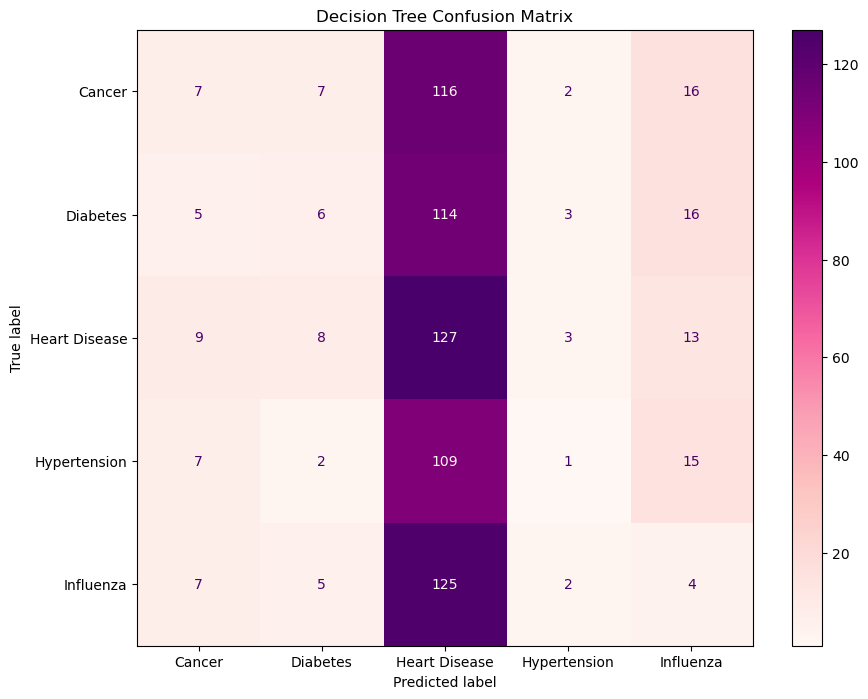

In [7]:
# -------------------------------------------------------
# Train and Evaluate a Decision Tree Classifier (Colored CM)
# -------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Instantiate the DecisionTreeClassifier
tree = DecisionTreeClassifier(
    max_depth=6,
    criterion='entropy',
    random_state=1
)

# Step 2: Fit the model
tree.fit(X_train, y_train)

# Step 3: Predict labels
y_pred_tree = tree.predict(X_test)

# Step 4: Evaluation
print("\n- Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_tree) * 100, 2), "%")
print("\n- Classification Report:\n", classification_report(y_test, y_pred_tree, target_names=le.classes_))

print("\n- Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_tree)

# Display confusion matrix with color
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='RdPu', ax=ax)

plt.title("Decision Tree Confusion Matrix")
plt.show()


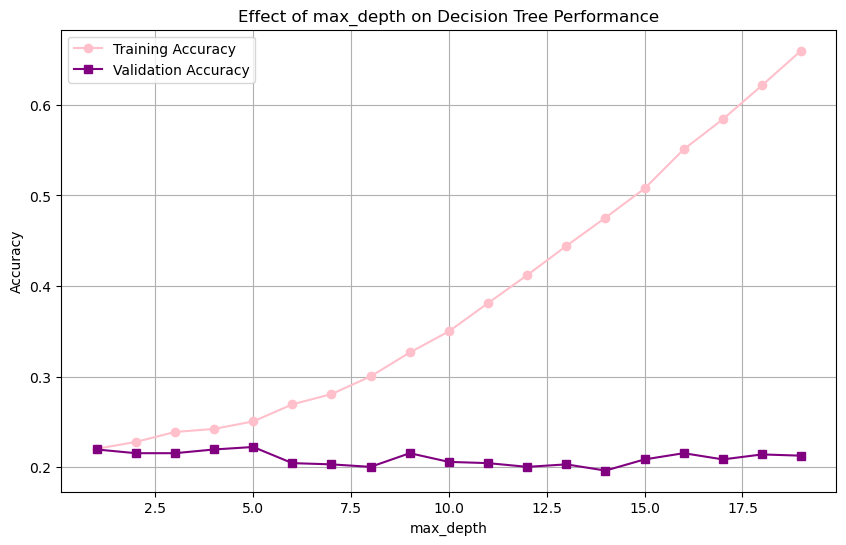

In [8]:
# -------------------------------------------------------
# Evaluate accuracy for different max_depth values
# -------------------------------------------------------

# Initialize lists to store accuracy scores for training and validation sets
train_scores = []
val_scores = []

# Define the range of max_depth values to test (from 1 to 19)
depth_range = range(1, 20)

# Loop over each depth value and train a Decision Tree model
for d in depth_range:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)  # Set tree depth
    model.fit(X_train, y_train)  # Train on training data

    # Predict on training and test sets
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)

    # Record the accuracy for both sets
    train_scores.append(accuracy_score(y_train, train_pred))
    val_scores.append(accuracy_score(y_test, val_pred))


# -------------------------------------------------------
# Plot Training vs. Validation Accuracy
# -------------------------------------------------------

plt.figure(figsize=(10, 6))

# Plot training accuracy for each depth
plt.plot(depth_range, train_scores, label='Training Accuracy', marker='o', color='pink')

# Plot validation accuracy for each depth
plt.plot(depth_range, val_scores, label='Validation Accuracy', marker='s', color='purple')

# Add axis labels and title
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Decision Tree Performance')

# Add legend and grid for better readability
plt.legend()
plt.grid(True)
plt.show()

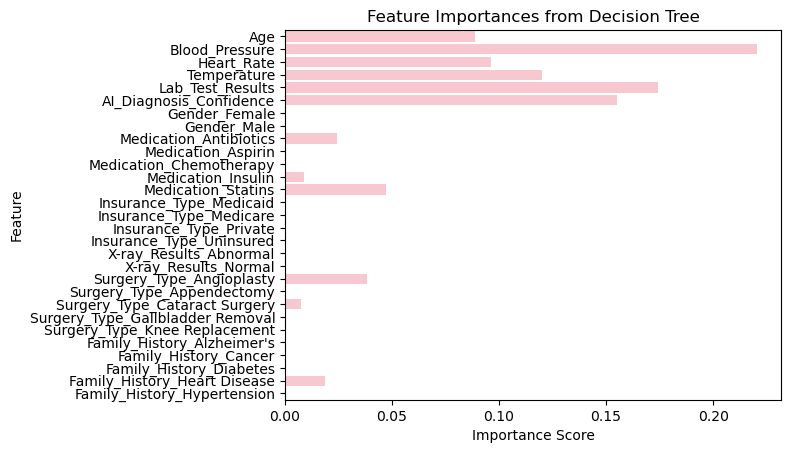

In [9]:
# -------------------------------------------------------
# Visualize Feature Importances from the Decision Tree
# -------------------------------------------------------

# Get the importance score for each feature
# This reflects how much each feature contributed to reducing impurity (e.g., entropy or Gini)
importances = tree.feature_importances_

# Get the corresponding feature names (column labels from X)
features = X.columns

# Plot feature importances as a horizontal bar chart
sns.barplot(x=importances, y=features, color='pink')

# Add plot title and axis labels
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

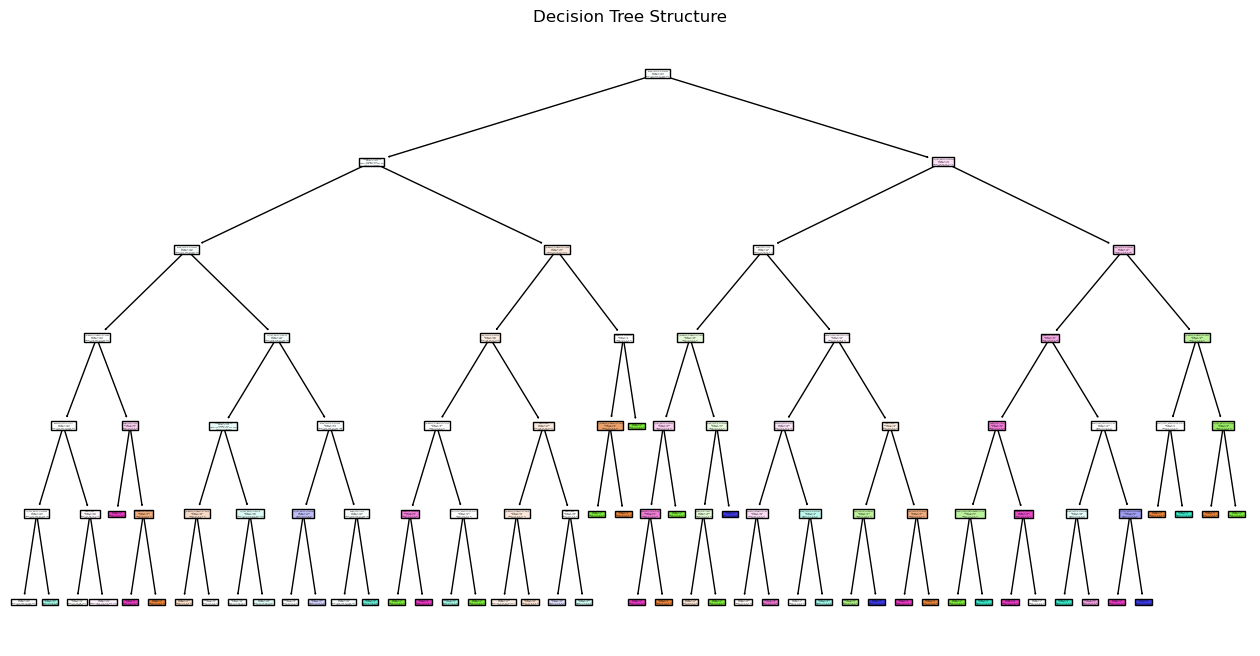

In [10]:
#Step 5: Visualize the tree

# Dr's code: Create a larger figure to accommodate tree structure and labels
plt.figure(figsize=(16, 8))
# Plot the trained decision tree
plot_tree(
 tree,
 feature_names = X.columns, # column names from X (used as split criteria)
 class_names = le.classes_, # original class labels (from LabelEncoder) for readability
 filled = True # color nodes by predicted class and purity
)
# Add a title and display the tree
plt.title("Decision Tree Structure")
plt.show()


## **3. Naive Bayes Classifier**


- Naive Bayes Accuracy: 19.48 %

- Classification Report:
                precision    recall  f1-score   support

       Cancer       0.18      0.24      0.21       148
     Diabetes       0.21      0.21      0.21       144
Heart Disease       0.24      0.30      0.27       160
 Hypertension       0.16      0.12      0.14       134
    Influenza       0.14      0.08      0.11       143

     accuracy                           0.19       729
    macro avg       0.19      0.19      0.18       729
 weighted avg       0.19      0.19      0.19       729


- Confusion Matrix:


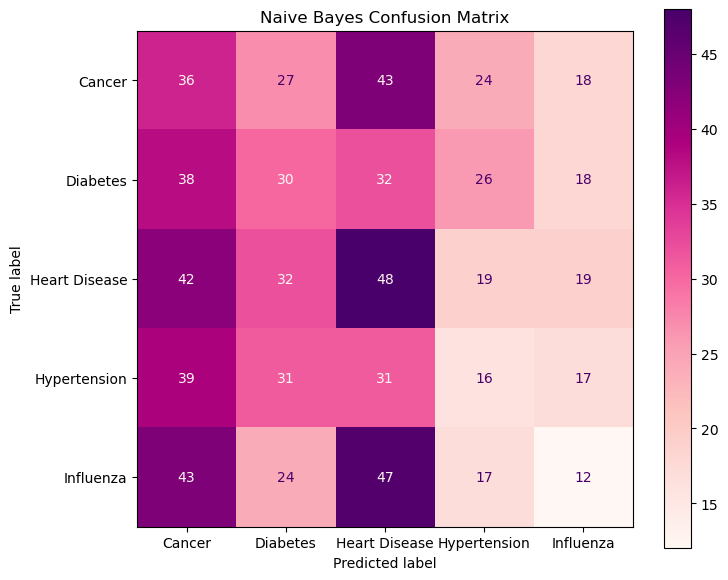

In [12]:
# ------------------------------------------------
# Step 2: Train and Evaluate Naive Bayes Classifier
# ------------------------------------------------
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Instantiate the Naive Bayes model
nb = GaussianNB()

# Step 2: Fit the model to the training data
nb.fit(X_train, y_train)

# Step 3: Predict class labels on the test data
y_pred_nb = nb.predict(X_test)

# Step 4: Evaluate the model's performance
# Accuracy score
print("\n- Naive Bayes Accuracy:", round(accuracy_score(y_test, y_pred_nb) * 100, 2), "%")

# Detailed performance report
print("\n- Classification Report:\n", classification_report(y_test, y_pred_nb, target_names=le.classes_))

# Confusion matrix
print("\n- Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(8, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='RdPu', ax=ax)

plt.title("Naive Bayes Confusion Matrix")
plt.show()

print("\n")


## **4. Comparing Results Across Models**

In [14]:
# -------------------------------------------------------
# Perform 5-Fold Cross-Validation to Compare Models
# -------------------------------------------------------

# Evaluate Decision Tree model using cross-validation
scores_tree = cross_val_score(tree,   # Model
                              X, y,   # X and y: entire dataset
                              cv=5,   # 5-fold split
                              scoring='accuracy'  # use accuracy as the evaluation metric
                              )

# Evaluate Naive Bayes model in the same way
scores_nb = cross_val_score(nb, X, y, cv=5, scoring='accuracy')

# Print the average cross-validated accuracy for each model
print("Decision Tree - Cross-validated Accuracy:", (scores_tree.mean() * 100).round(2), "%")
print("Naive Bayes   - Cross-validated Accuracy:", (scores_nb.mean() * 100).round(2), "%")

Decision Tree - Cross-validated Accuracy: 22.01 %
Naive Bayes   - Cross-validated Accuracy: 19.7 %


# **Documenting Findings from Pattern Mining✏️**

## **1. **

## **2. Decision Tree Classifier 🌳**

#### **Model Building 🏗**
- Used DecisionTreeClassifier from sklearn.
- Model configuration: max_depth=6 and criterion='entropy'.
- The model was trained using 80% of the data and tested on the remaining 20%.

#### **Evaluation Metrics 📊**
- **Accuracy**: 19.89%
- **Classification Report**:
  - Overall performance was weak.
  - The **"Heart Disease"** class had the best recall (recall = 0.79).
  - Other classes had very low precision and recall (mostly below 0.2).

#### **Confusion Matrix 🔀**
- Showed high misclassification and scattered predictions.
- The model tended to predict most samples as *"Heart Disease"*.

#### **Depth Tuning 🔧**
- Different max_depth values from 1 to 19 were tested.
- **Result**: Increasing depth improved training accuracy but didn’t significantly enhance validation accuracy (possible overfitting).

#### **Feature Importance ⭐**
- A bar chart was plotted to show feature importances.
- Most impactful features:
  - AI_Diagnosis_Confidence
  - Lab_Test_Results
  - Heart_Rate

#### **Tree Visualization 🌲**
- The tree structure was plotted using plot_tree.
- Included feature names and class labels for better interpretability.

## **3. The Naive Bayes Confusion Matrix: 🛠**
When looking at the Naive Bayes results, the confusion matrix and classification report showed that the model struggled with predictions, with an overall accuracy of 19.48%. It often misclassified several diseases, especially by predicting "Heart Disease" more frequently. This shows that the model is not performing well, and it may be that the features used are not informative enough for accurate classification.


## **4. Comparing Results Across Models: ⚖**
When comparing the Desicion Tree and Naive Bayes it showed that when Cross-validated technique was checked, that means that the accuracy was not just measured once, but averaged across multiple splits of the data. 
The Decision Tree model correctly predicted the output 22.01% of the time on average. While the Naive Bayes model was slightly worse, with a 19.7% average accuracy. Which show that both accuracies are low; which indicates that the models are not performing very well, and the features used may not be informative.

## **Summary 📝**

- Both models showed **weak performance**, which may indicate challenges in the dataset such as overlapping classes or poor feature representation.
- The **Decision Tree** performed slightly better and could be improved by:
  - Fine-tuning hyperparameters.
  - Using more advanced models such as **Random Forest** or **XGBoost** for better results.